In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [110]:
#setting directory for data files
data_dir = 'Covid19-dataset'
train_dir = 'Covid19-dataset/train'
test_dir = 'Covid19-dataset/test'
valid_dir = 'Covid19-dataset/validation/'


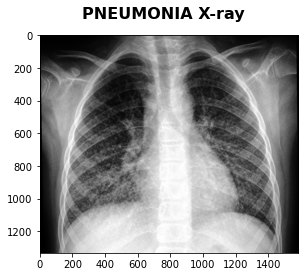

In [58]:
pneumonia_sample = imread(train_dir+"/Viral Pneumonia"+"/01.jpeg")
plt.imshow(pneumonia_sample)
plt.suptitle('PNEUMONIA X-ray', fontsize=16, weight='bold');

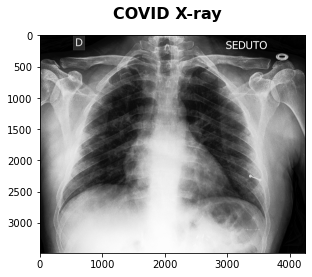

In [59]:
covid_sample = imread(train_dir+"/Covid"+"/01.jpeg")
plt.imshow(covid_sample)
plt.suptitle('COVID X-ray', fontsize=16, weight='bold');

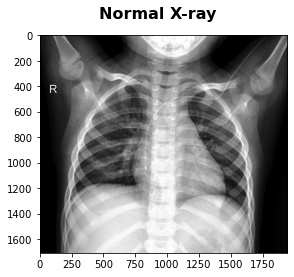

In [60]:
normal_sample = imread(train_dir+"/Normal"+"/01.jpeg")
plt.imshow(normal_sample)
plt.suptitle('Normal X-ray', fontsize=16, weight='bold');

In [49]:
#data augmentation
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)

In [148]:
training_set = train_data_gen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_data_gen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 249 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [66]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Activation, Dense, Flatten, BatchNormalization
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D

In [67]:
#building model architecture
img_size = (224,224,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = img_size))
model.add(MaxPool2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(3, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 54, 54, 128)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 256)      

In [231]:
history = model.fit(training_set, validation_data=test_set,steps_per_epoch=(224/16), epochs=10)

Epoch 1/10
14/14 [==============================] - 31s 2s/step - loss: 0.0916 - accuracy: 0.9677 - val_loss: 0.2320 - val_accuracy: 0.9385
Epoch 2/10
14/14 [==============================] - 30s 2s/step - loss: 0.2123 - accuracy: 0.9263 - val_loss: 0.3237 - val_accuracy: 0.9077
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.1890 - accuracy: 0.9355 - val_loss: 0.1058 - val_accuracy: 0.9846
Epoch 4/10
14/14 [==============================] - 29s 2s/step - loss: 0.1201 - accuracy: 0.9447 - val_loss: 0.2363 - val_accuracy: 0.9538
Epoch 5/10
14/14 [==============================] - 30s 2s/step - loss: 0.1629 - accuracy: 0.9401 - val_loss: 0.2165 - val_accuracy: 0.9385
Epoch 6/10
14/14 [==============================] - 30s 2s/step - loss: 0.1079 - accuracy: 0.9509 - val_loss: 0.1679 - val_accuracy: 0.9538
Epoch 7/10
14/14 [==============================] - 32s 2s/step - loss: 0.0790 - accuracy: 0.9539 - val_loss: 0.1707 - val_accuracy: 0.9538
Epoch 8/10
14/14 [==

In [232]:
model.save('model.h5')

In [233]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9723502397537231
validation_accuracy 0.9230769276618958


<AxesSubplot:>

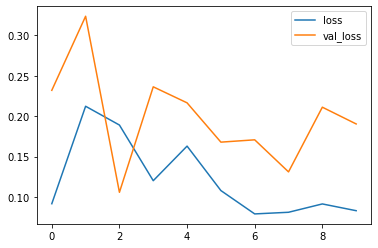

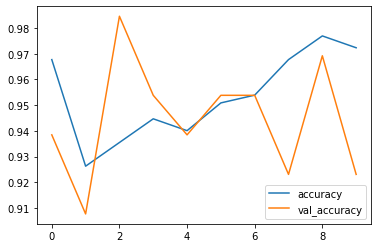

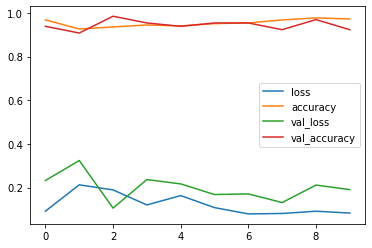

In [234]:
loss = pd.DataFrame(history.history)
loss.head()
loss[['loss','val_loss']].plot() 
loss[['accuracy','val_accuracy']].plot() 
loss.plot()

In [235]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

classes = ["COVID19", "NORMAL", "VIRAL PNEUMONIA"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

5/5 [==============================] - 2s 424ms/step


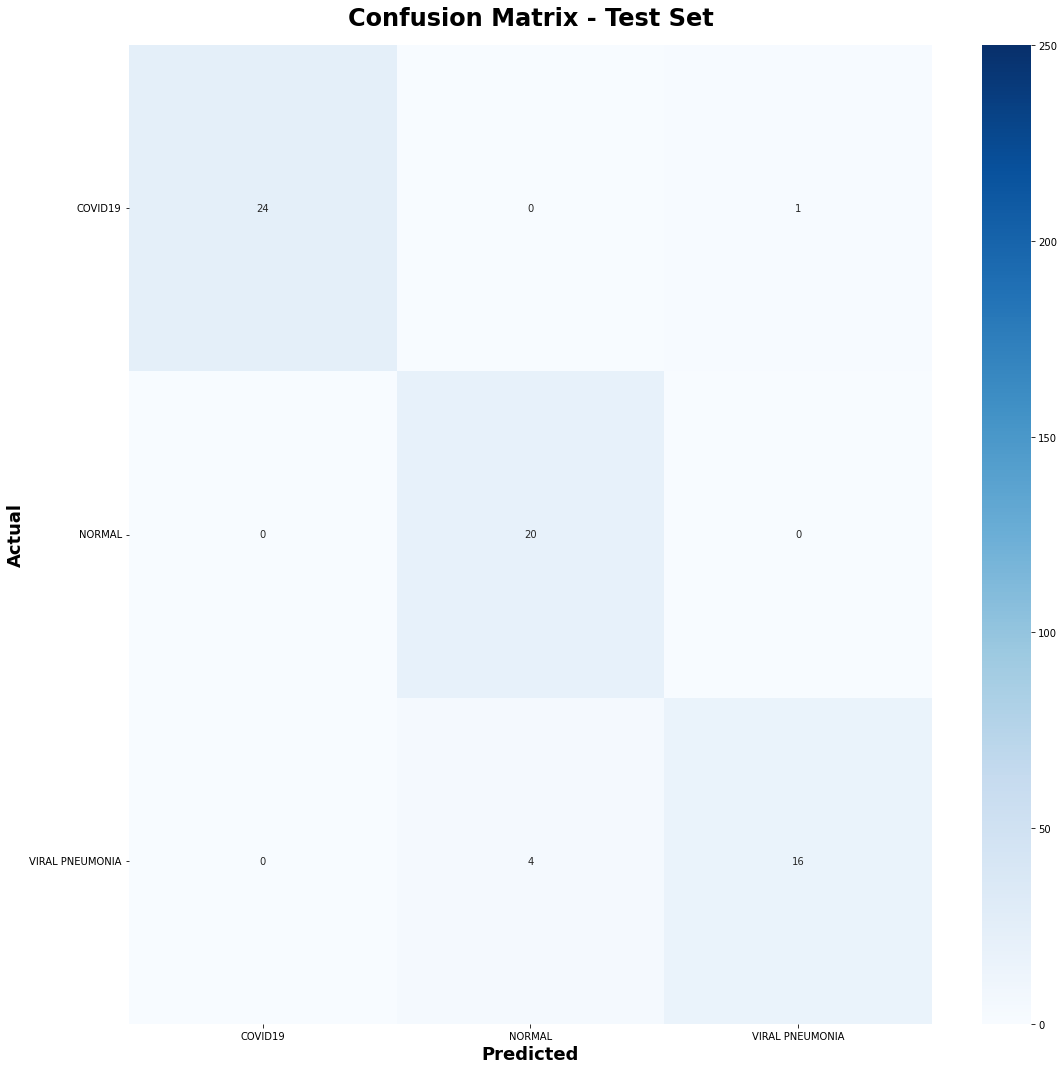

In [236]:
Matrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(18, 18))
ax = sns.heatmap(Matrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 18,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 18,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 24,weight = 'bold',pad=20);

In [238]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.83      1.00      0.91        20
           2       0.94      0.80      0.86        20

    accuracy                           0.92        65
   macro avg       0.92      0.92      0.92        65
weighted avg       0.93      0.92      0.92        65



In [239]:
class_dict = {0:'C',
              1:'N',
              2:'V'}


In [240]:

import os
lbl=[]
out=[]
for i in os.listdir(valid_dir):
    test_img = tf.keras.utils.load_img(valid_dir+i,target_size=(224,224))
    test_img = tf.keras.utils.img_to_array(test_img)
    test_img = np.expand_dims(test_img,axis=0)
    pred=model.predict(test_img)
    pred_class = np.argmax(pred)
    f_pred_class = class_dict[pred_class]
    lbl.append(i)
    out.append(f_pred_class)
    print("Picture #", i,"\n Diagnosis: ", f_pred_class)



1/1 [==============================] - 0s 50ms/step
Picture # pic1.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 52ms/step
Picture # pic10.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 62ms/step
Picture # pic2.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 61ms/step
Picture # pic3.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 57ms/step
Picture # pic4.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 64ms/step
Picture # pic5.jpeg 
 Diagnosis:  N
1/1 [==============================] - 0s 53ms/step
Picture # pic6.jpeg 
 Diagnosis:  C
1/1 [==============================] - 0s 53ms/step
Picture # pic7.jpg 
 Diagnosis:  C
1/1 [==============================] - 0s 53ms/step
Picture # pic8.jpeg 
 Diagnosis:  V
1/1 [==============================] - 0s 52ms/step
Picture # pic9.jpeg 
 Diagnosis:  C


1/1 [==============================] - 0s 123ms/step
prediction:  C


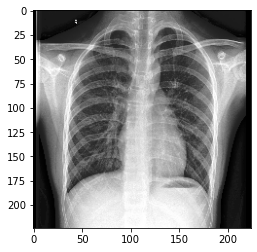

In [241]:
file_path =  'pic1.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 51ms/step
prediction:  C


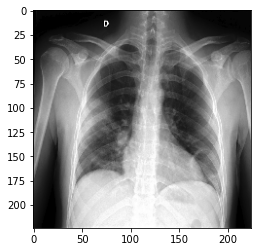

In [242]:
file_path =  'pic2.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 52ms/step
prediction:  C


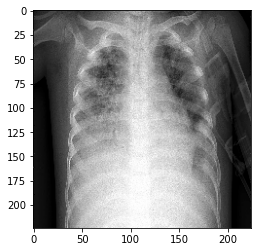

In [243]:
file_path =  'pic3.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 60ms/step
prediction:  V


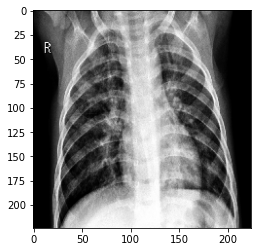

In [244]:
file_path =  'pic4.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 51ms/step
prediction:  N


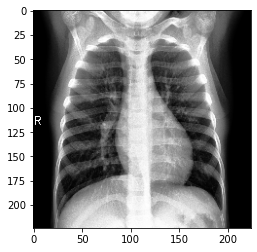

In [245]:
file_path =  'pic5.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 52ms/step
prediction:  C


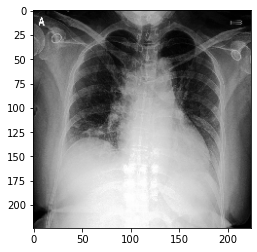

In [246]:
file_path =  'pic6.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

In [248]:
file_path =  'pic7.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224), interpolation = cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


1/1 [==============================] - 0s 56ms/step
prediction:  V


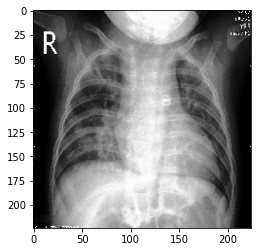

In [249]:
file_path =  'pic8.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 53ms/step
prediction:  C


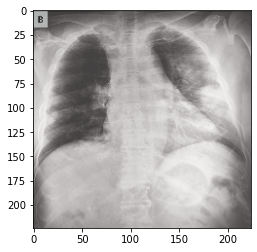

In [250]:
file_path =  'pic9.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)

1/1 [==============================] - 0s 53ms/step
prediction:  C


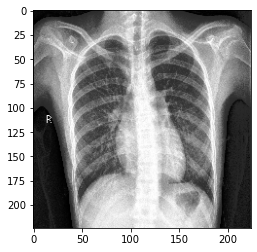

In [251]:
file_path =  'pic10.jpeg'
test_image = cv2.imread(valid_dir+file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_NEAREST)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)

pred_class = np.argmax(model.predict(test_image))

pred_class = class_dict[pred_class]

print('prediction: ',pred_class)